<a href="https://colab.research.google.com/github/taranggpt6/Machine-Learning-DS/blob/master/Housing_Assignment_%2C_Regularization%2C_Ridge_%2B_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings # supress warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('train.csv')
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [0]:
data.shape

(1460, 81)

In [0]:
data.describe().shape #numerical variables #38

(8, 38)

In [0]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
#temp = pd.DataFrame({'index':list(range(1,len(data.columns)+1)), 'columns_value' : data.columns })
#temp.set_index('index', inplace=True)

#temp.head()

#dict(zip(list(range(1,len(data.columns)+1)),data.columns))

# <font color='#891360'> Data Cleaning </font>

(array([75.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  3.]),
 array([ 0.   ,  9.952, 19.904, 29.856, 39.808, 49.76 , 59.712, 69.664,
        79.616, 89.568, 99.52 ]),
 <a list of 10 Patch objects>)

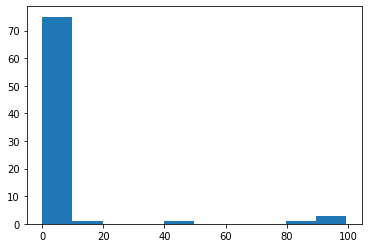

In [0]:
missing_per = round(data.isna().sum(axis=0)/len(data.any(axis=1))*100,2)
#missing_per[missing_per>50]
#missing_per.head(50)
plt.hist(missing_per)

In [0]:
missing_per[missing_per!=0] #19 columns having missing values

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

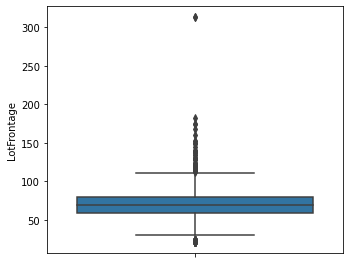

In [0]:
#Outliers checking

#Planned to make Boxplot of each of the columns where null values exist

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
sb.boxplot(y=data['LotFrontage']) #one 1 outlier jo kaam kharab kr rha tha , take median value beedu

In [0]:
#LotFrontage = data[~data['LotFrontage'].isna()] #checking if null values in LotFrontage 
#LotFrontage

In [0]:
data['LotFrontage'].fillna(data['LotFrontage'].median(),inplace=True)

In [0]:
data[data.LotFrontage.isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In Alley columns NA implies "No alley access" which gives a information

In [0]:
data['Alley'].replace(np.nan,'No Access',inplace=True)

In [0]:
data[data['Alley'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [0]:
data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

imputing null values of "MasVnrType" with BrkFace

In [0]:
data['MasVnrType'].fillna('BrkFace',inplace=True)

In [0]:
data[data['MasVnrType'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [0]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

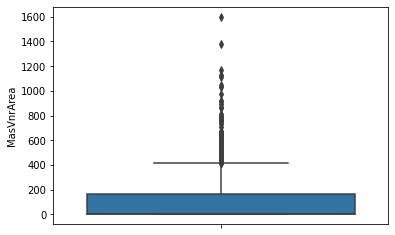

In [0]:
sb.boxplot(y=data['MasVnrArea']) #Clearly Outliers

Most of the data in "MasVnrArea" is haivng 0 values (median), imputing with zero

In [0]:
data['MasVnrArea'].fillna(0,inplace=True)

In [0]:
data[data['MasVnrArea'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [0]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

imputing null values of BsmtQual with : 'Fa' to avoid imbalance

In [0]:
#.iloc[0:10].fillna('TA',inplace=True)

In [0]:
#BsmtQual.iloc[0:10]['BsmtQual'].fillna('TA',inplace=True)

In [0]:
data['BsmtQual'].fillna('No Basement',inplace=True)

In [0]:
data[data['BsmtQual'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [0]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

imputng "BsmtCond" with "TA" as most of records in "BsmtQual" having "Fa" are having "TA" in column " BsmtCond"

In [0]:
data['BsmtCond'].fillna('No Basement',inplace=True)

In [0]:
data[data['BsmtCond'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [0]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

imputing "BsmtExposure" with "No" as most of the records having "BsmtQual" = "Fa" and "BsmtCond" = "TA" are having "BsmtExposure" = "No

In [0]:
data['BsmtExposure'].fillna('No Basement',inplace=True)

In [0]:
len(data[data['BsmtExposure'].isna()]) #38

0

In [0]:
data['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [0]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [0]:
data['BsmtFinType1'].fillna('No Basement',inplace=True)
data['BsmtFinType2'].fillna('No Basement',inplace=True)

In [0]:
print(len(data[data['BsmtFinType1'].isna()]))
print(len(data[data['BsmtFinType2'].isna()]))

0
0


In [0]:
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [0]:
data[data['Electrical'].isna()]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street      Alley  \
1379  1380          80       RL         73.0     9735   Pave  No Access   

     LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
1379      Reg         Lvl    AllPub    Inside       Gtl       Timber   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
1379       Norm       Norm     1Fam       SLvl            5            5   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
1379       2006          2007     Gable  CompShg     VinylSd     VinylSd   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379       None         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  
1379        Normal     167500

In [0]:
data[data['BsmtQual']=='Gd']['Electrical'].value_counts()

SBrkr    608
FuseA      6
FuseF      3
Name: Electrical, dtype: int64

Imputing Electrical with "SBrkr" as where BsmtQual = Gd , most occurance of Value in Electrical is "SBrkr"

In [0]:
data['Electrical'].fillna('SBrkr',inplace=True)

In [0]:
data['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

Imputing null values of "FireplaceQu" with "No Fireplace" as NA is itself some information

In [0]:
data['FireplaceQu'].fillna('No Fireplace',inplace=True)

In [0]:
len(data[data['FireplaceQu'].isna()])

0

#### Left Columns having missing values
GarageType       5.55<br>
GarageYrBlt      5.55<br>
GarageFinish     5.55<br>
GarageQual       5.55<br>
GarageCond       5.55<br>
PoolQC          99.52<br>
Fence           80.75<br>
MiscFeature     96.30

Imputing null values of "GarageType"  with "No Garage" as it is itslef some information

In [0]:
data['GarageType'].fillna('No Garage',inplace=True)

In [0]:
data[data['GarageType'].isna()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

#### <font color='red'>"GarageYrBlt" has missing values only for rhose values where "GarageType" = "No Garage" this, Garage was never there so the date of Garagte was build will be nothing.</font>

Imputing "GarageYrBlt" = "No Garage"

In [0]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [0]:
data['GarageYrBlt'].fillna('0',inplace=True)

In [0]:
data[data['GarageYrBlt'].isna()].head(50)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

Where garage was never build "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", and "GarageCond" won't be having any values.
imputing null values for all rest of mentioned columns as "No Garage"

In [0]:
data['GarageFinish'].fillna('No Garage',inplace=True)
data['GarageQual'].fillna('No Garage',inplace=True)
data['GarageCond'].fillna('No Garage',inplace=True)

In [0]:
print(len(data[data['GarageFinish'].isna()])) #81
print(len(data[data['GarageQual'].isna()])) #81
print(len(data[data['GarageCond'].isna()])) #81

0
0
0


PoolQC          99.52<br>
Fence           80.75<br>
MiscFeature     96.30

In [0]:
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

Imputing Null values of "PoolQC" with "No Pool" as it is an information

In [0]:
data['PoolQC'].fillna('No pool',inplace=True)

In [0]:
len(data[data['PoolQC'].isna()]) #1453

0

In [0]:
data['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

Imputing Null values of "Fence" with "No fence" as it is an information

In [0]:
data['Fence'].fillna('No fence',inplace=True)

In [0]:
len(data[data['Fence'].isna()]) #1179

0

In [0]:
data['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

Imputing Null values of "MiscFeature" with "None" as it is an information

In [0]:
data['MiscFeature'].fillna('None',inplace=True)

In [0]:
len(data[data['MiscFeature'].isna()]) #1406

0

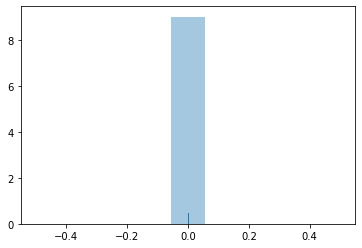

In [0]:
check = data.isna().sum(axis=0)/len(data.any(axis=1))*100
sb.distplot(check,rug=True) #ALL ZEROS

### END : missing_values treatment

In [0]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street      Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  No Access      Reg   
1   2          20       RL         80.0     9600   Pave  No Access      Reg   
2   3          60       RL         68.0    11250   Pave  No Access      IR1   
3   4          70       RL         60.0     9550   Pave  No Access      IR1   
4   5          60       RL         84.0    14260   Pave  No Access      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ     

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [0]:
data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [0]:
map_MSSubClass =  dict(zip(data['MSSubClass'].value_counts().index,['1-STORY 1946 & NEWER ALL STYLES','2-STORY 1946 & NEWER',
'1-1/2 STORY FINISHED ALL AGES','1-STORY PUD (Planned Unit Development) - 1946 & NEWER','1-STORY 1945 & OLDER','2-STORY PUD - 1946 & NEWER',
'2-STORY 1945 & OLDER','SPLIT OR MULTI-LEVEL','DUPLEX - ALL STYLES AND AGES','2 FAMILY CONVERSION - ALL STYLES AND AGES',
'SPLIT FOYER','2-1/2 STORY ALL AGES','1-1/2 STORY - UNFINISHED ALL AGES','PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
'1-STORY W/FINISHED ATTIC ALL AGES']))
data['MSSubClass'] = data['MSSubClass'].map(map_MSSubClass)


BsmtFullBath     1460 non-null int64<br> cat
BsmtHalfBath     1460 non-null int64<br> cat
FullBath         1460 non-null int64<br> cat
HalfBath         1460 non-null int64<br> cat
BedroomAbvGr     1460 non-null int64<br> cat
KitchenAbvGr     1460 non-null int64<br> cat
TotRmsAbvGrd     1460 non-null int64<br> cat
Fireplaces       1460 non-null int64<br> cat

GarageYrBlt      1460 non-null object<br> Date

GarageCars       1460 non-null int64<br> cat


MoSold           1460 non-null int64<br> date
YrSold           1460 non-null int64<br> date


In [0]:
ind = data['OverallQual'].value_counts().index
ind = list(ind)
ind.sort()
map_OverallQual = dict(zip(ind,['Very Poor','Poor','Fair','Below Average','Average','Above Average','Good','Very Good','Excellent','Very Excellent']))
data['OverallQual'] = data['OverallQual'].map(map_OverallQual)

In [0]:
ind2 = data['OverallCond'].value_counts().index
ind2 = list(ind2)
ind2.sort()
map_OverallCond = dict(zip(ind2,['Very Poor','Poor','Fair','Below Average','Average','Above Average','Good','Very Good','Excellent']))
data['OverallCond'] = data['OverallCond'].map(map_OverallCond)


In [0]:
data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Access      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Access      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Access      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Access      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Access      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   
3       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4       2000          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3

In [0]:
numerical_catogorical = ['YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold']

In [0]:
data[numerical_catogorical] = data[numerical_catogorical].astype(str) # This is correct, running

In [0]:
data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Access      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Access      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Access      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Access      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Access      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

  YearBuilt YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0      2003         2003     Gable  CompShg     VinylSd     VinylSd   
1      1976         1976     Gable  CompShg     MetalSd     MetalSd   
2      2001         2002     Gable  CompShg     VinylSd     VinylSd   
3      1915         1970     Gable  CompShg     Wd Sdng     Wd Shng   
4      2000         2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   
2           Mn          GLQ         486          Unf           0        434   
3           No          ALQ         216          Unf           0        540   
4           Av          GLQ         655          Unf           0        490   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   
2          920    GasA        Ex          Y      SBrkr       920       866   
3          756    GasA        Gd          Y      SBrkr       961       756   
4         1145    GasA        Ex          Y      SBrkr      1145      1053   

   LowQualFinSF  GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath  \
0             0       1710            1            0        2        1   
1             0       1262            0            1        2        0   
2             0       1786            1            0        2        1   
3             0       1717            1            0        1        0   
4             0       2198            1            0        2        1   

  BedroomAbvGr KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces  \
0            3            1          Gd            8        Typ          0   
1            3            1          TA            6        Typ          1   
2            3            1          Gd            6        Typ          1   
3    

In [0]:
data[['YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold']].head()

YearBuilt YearRemodAdd GarageYrBlt MoSold YrSold
0      2003         2003        2003      2   2008
1      1976         1976        1976      5   2007
2      2001         2002        2001      9   2008
3      1915         1970        1998      2   2006
4      2000         2000        2000     12   2008

#### Extracting Age of House and Garage by substracting "YrSold" - "YearRemodAdd" and "YrSold" - "GarageYrBlt" respectively.

In [0]:
data['Age Of House']= 2020 - data['YearBuilt'].astype(int)
#data['Age of Garage'] = data['YrSold'].astype(int) - data['GarageYrBlt'].astype(int)

Since We came up with the age of the House, below columns do not provide much information. Droping these

In [0]:
data.drop(columns=['Id','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],inplace=True) #82-6`bb

In [0]:
data.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

In [0]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Access      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Access      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Access      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Access      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Access      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0       1710            1            0        2        1            3   
1       1262            0            1        2        0            3   
2       1786            1            0        2        1            3   
3       1717            1            0        1        0            3   
4       2198            1            0        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu  \
0            1          Gd            8        Typ          0  No Fireplace   
1            1          TA            6        Typ          1            TA   
2            1          Gd            6        Typ          1            TA   
3            1          Gd            7        Typ          1            Gd   
4            1          Gd 

In [0]:
cols = data.columns
cols

object_type = []
num_type = []

for i in cols:
    if(data[i].dtype=='O'):
        object_type.append(i)
    else:
        num_type.append(i)

print('Lenght of Categorical Variables :',len(object_type))
print('Lenght of Numerical Variables :',len(num_type))

#Better way
#data.select_dtypes(include='object')

Lenght of Categorical Variables : 55
Lenght of Numerical Variables : 21


In [0]:
#num_type

### <font color='#891360'> Cleaning on Dependent Variable </font>

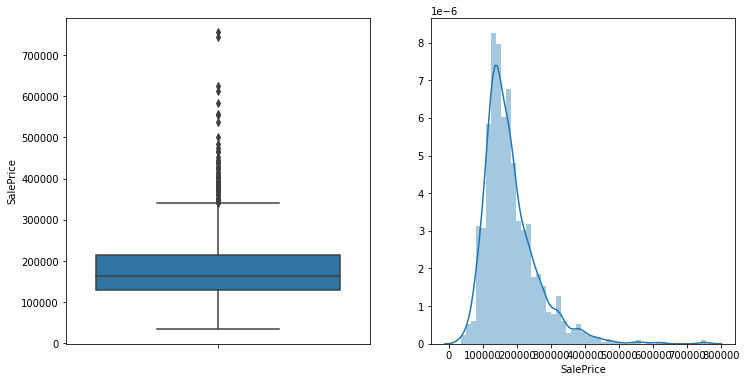

In [0]:
plt.figure(figsize=(12,6))
#np.quantile(data['SalePrice'],.75)
plt.subplot(1,2,1)
sb.boxplot(y=data['SalePrice'])

plt.subplot(1,2,2)
sb.distplot(data['SalePrice'])

In [0]:
data['SalePrice'].value_counts()

140000    20
135000    17
145000    14
155000    14
190000    13
          ..
84900      1
424870     1
415298     1
62383      1
34900      1
Name: SalePrice, Length: 663, dtype: int64

In [0]:
data['SalePrice'].describe(percentiles= [.25,.45,.50,.65,.75,.85,.95,.99])
#data[data['SalePrice']>np.quantile(data['SalePrice'],.99)]

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
45%      155000.000000
50%      163000.000000
65%      187500.000000
75%      214000.000000
85%      250000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [0]:
#imputing outliers with median
data['SalePrice'] = data['SalePrice'].apply(lambda x: 163000 if x>442567 else x )#Validated
data['SalePrice'].describe(percentiles= [.25,.45,.50,.65,.75,.85,.95,.99])

count      1460.000000
mean     176937.826712
std       69270.392151
min       34900.000000
25%      129975.000000
45%      155000.000000
50%      163000.000000
65%      185587.500000
75%      210250.000000
85%      244660.000000
95%      318003.050000
99%      394774.030000
max      440000.000000
Name: SalePrice, dtype: float64

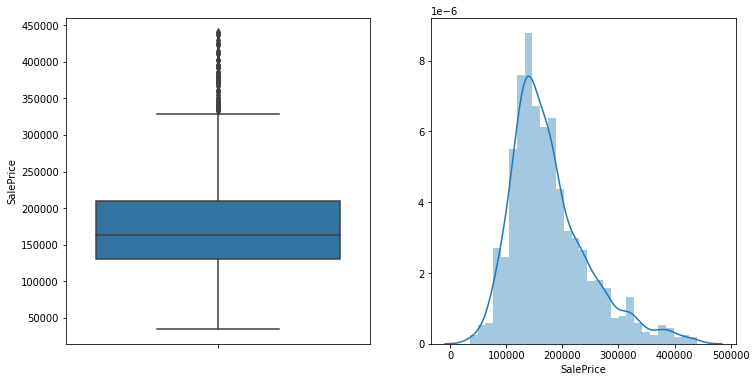

In [0]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.boxplot(y=data['SalePrice'])

plt.subplot(1,2,2)
sb.distplot(data['SalePrice'])

### <font color='#891360'> Data Feel </font>

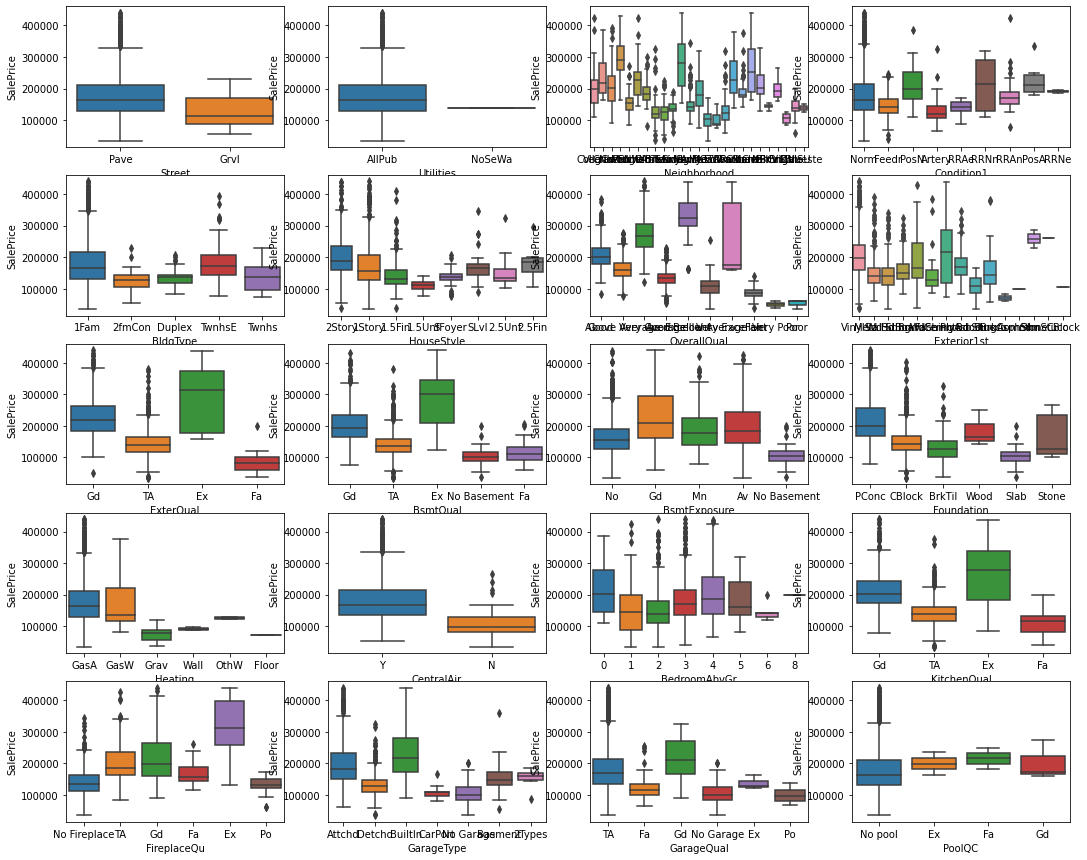

In [0]:
plt.figure(figsize=(18,15))
plt.subplot(5,4,1)
sb.boxplot(x=data.Street,y=data.SalePrice)

plt.subplot(5,4,2)
sb.boxplot(x=data.Utilities,y=data.SalePrice)

plt.subplot(5,4,3)
sb.boxplot(x=data.Neighborhood,y=data.SalePrice)

plt.subplot(5,4,4)
sb.boxplot(x=data.Condition1,y=data.SalePrice)

plt.subplot(5,4,5)
sb.boxplot(x=data.BldgType,y=data.SalePrice)

plt.subplot(5,4,6)
sb.boxplot(x=data.HouseStyle,y=data.SalePrice)

plt.subplot(5,4,7)
sb.boxplot(x=data.OverallQual,y=data.SalePrice)

plt.subplot(5,4,8)
sb.boxplot(x=data.Exterior1st,y=data.SalePrice)

plt.subplot(5,4,9)
sb.boxplot(x=data.ExterQual,y=data.SalePrice)

plt.subplot(5,4,10)
sb.boxplot(x=data.BsmtQual,y=data.SalePrice)

plt.subplot(5,4,11)
sb.boxplot(x=data.BsmtExposure,y=data.SalePrice)

plt.subplot(5,4,12)
sb.boxplot(x=data.Foundation,y=data.SalePrice)

plt.subplot(5,4,13)
sb.boxplot(x=data.Heating,y=data.SalePrice)

plt.subplot(5,4,14)
sb.boxplot(x=data.CentralAir,y=data.SalePrice)

plt.subplot(5,4,15)
sb.boxplot(x=data.BedroomAbvGr,y=data.SalePrice)

plt.subplot(5,4,16)
sb.boxplot(x=data.KitchenQual,y=data.SalePrice)

plt.subplot(5,4,17)
sb.boxplot(x=data.FireplaceQu,y=data.SalePrice)

plt.subplot(5,4,18)
sb.boxplot(x=data.GarageType,y=data.SalePrice)

plt.subplot(5,4,19)
sb.boxplot(x=data.GarageQual,y=data.SalePrice)

plt.subplot(5,4,20)
sb.boxplot(x=data.PoolQC,y=data.SalePrice)





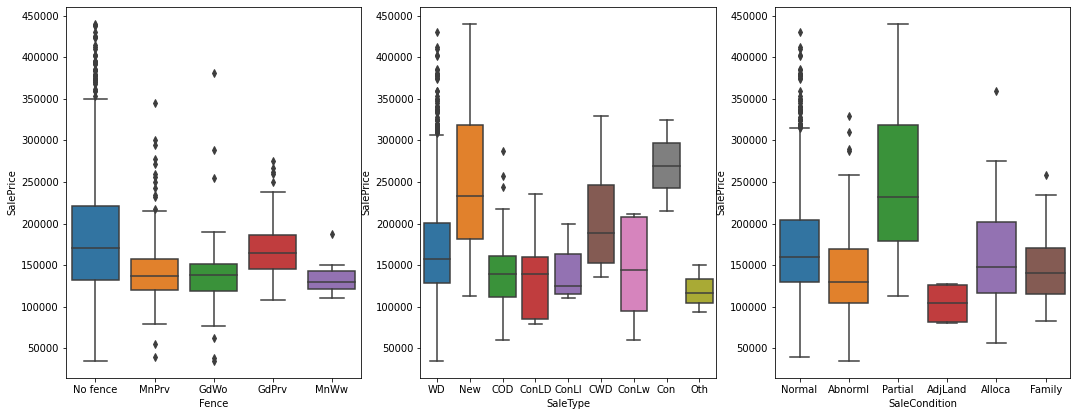

In [0]:
plt.figure(figsize=(18,15))

plt.subplot(2,3,1)
sb.boxplot(x=data.Fence,y=data.SalePrice)

plt.subplot(2,3,2)
sb.boxplot(x=data.SaleType,y=data.SalePrice)

plt.subplot(2,3,3)
sb.boxplot(x=data.SaleCondition,y=data.SalePrice)


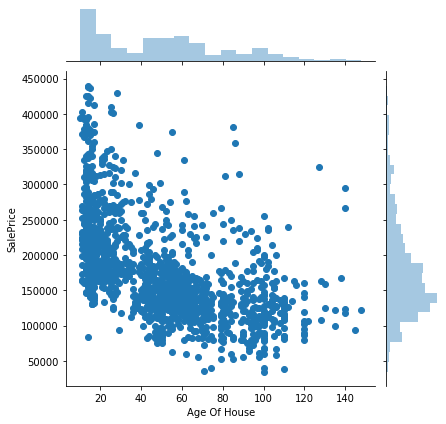

In [0]:

sb.jointplot(x=data['Age Of House'],y=data.SalePrice)

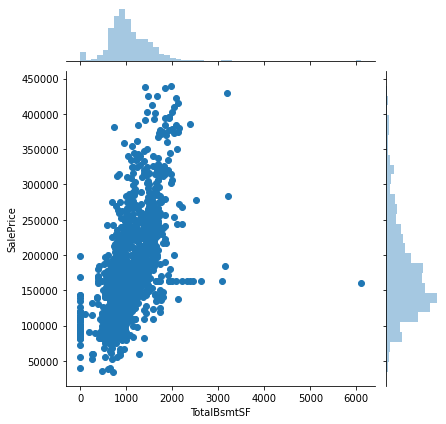

In [0]:
sb.jointplot(x=data.TotalBsmtSF,y=data.SalePrice)

In [0]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Access      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Access      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Access      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Access      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Access      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0       1710            1            0        2        1            3   
1       1262            0            1        2        0            3   
2       1786            1            0        2        1            3   
3       1717            1            0        1        0            3   
4       2198            1            0        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu  \
0            1          Gd            8        Typ          0  No Fireplace   
1            1          TA            6        Typ          1            TA   
2            1          Gd            6        Typ          1            TA   
3            1          Gd            7        Typ          1            Gd   
4            1          Gd 

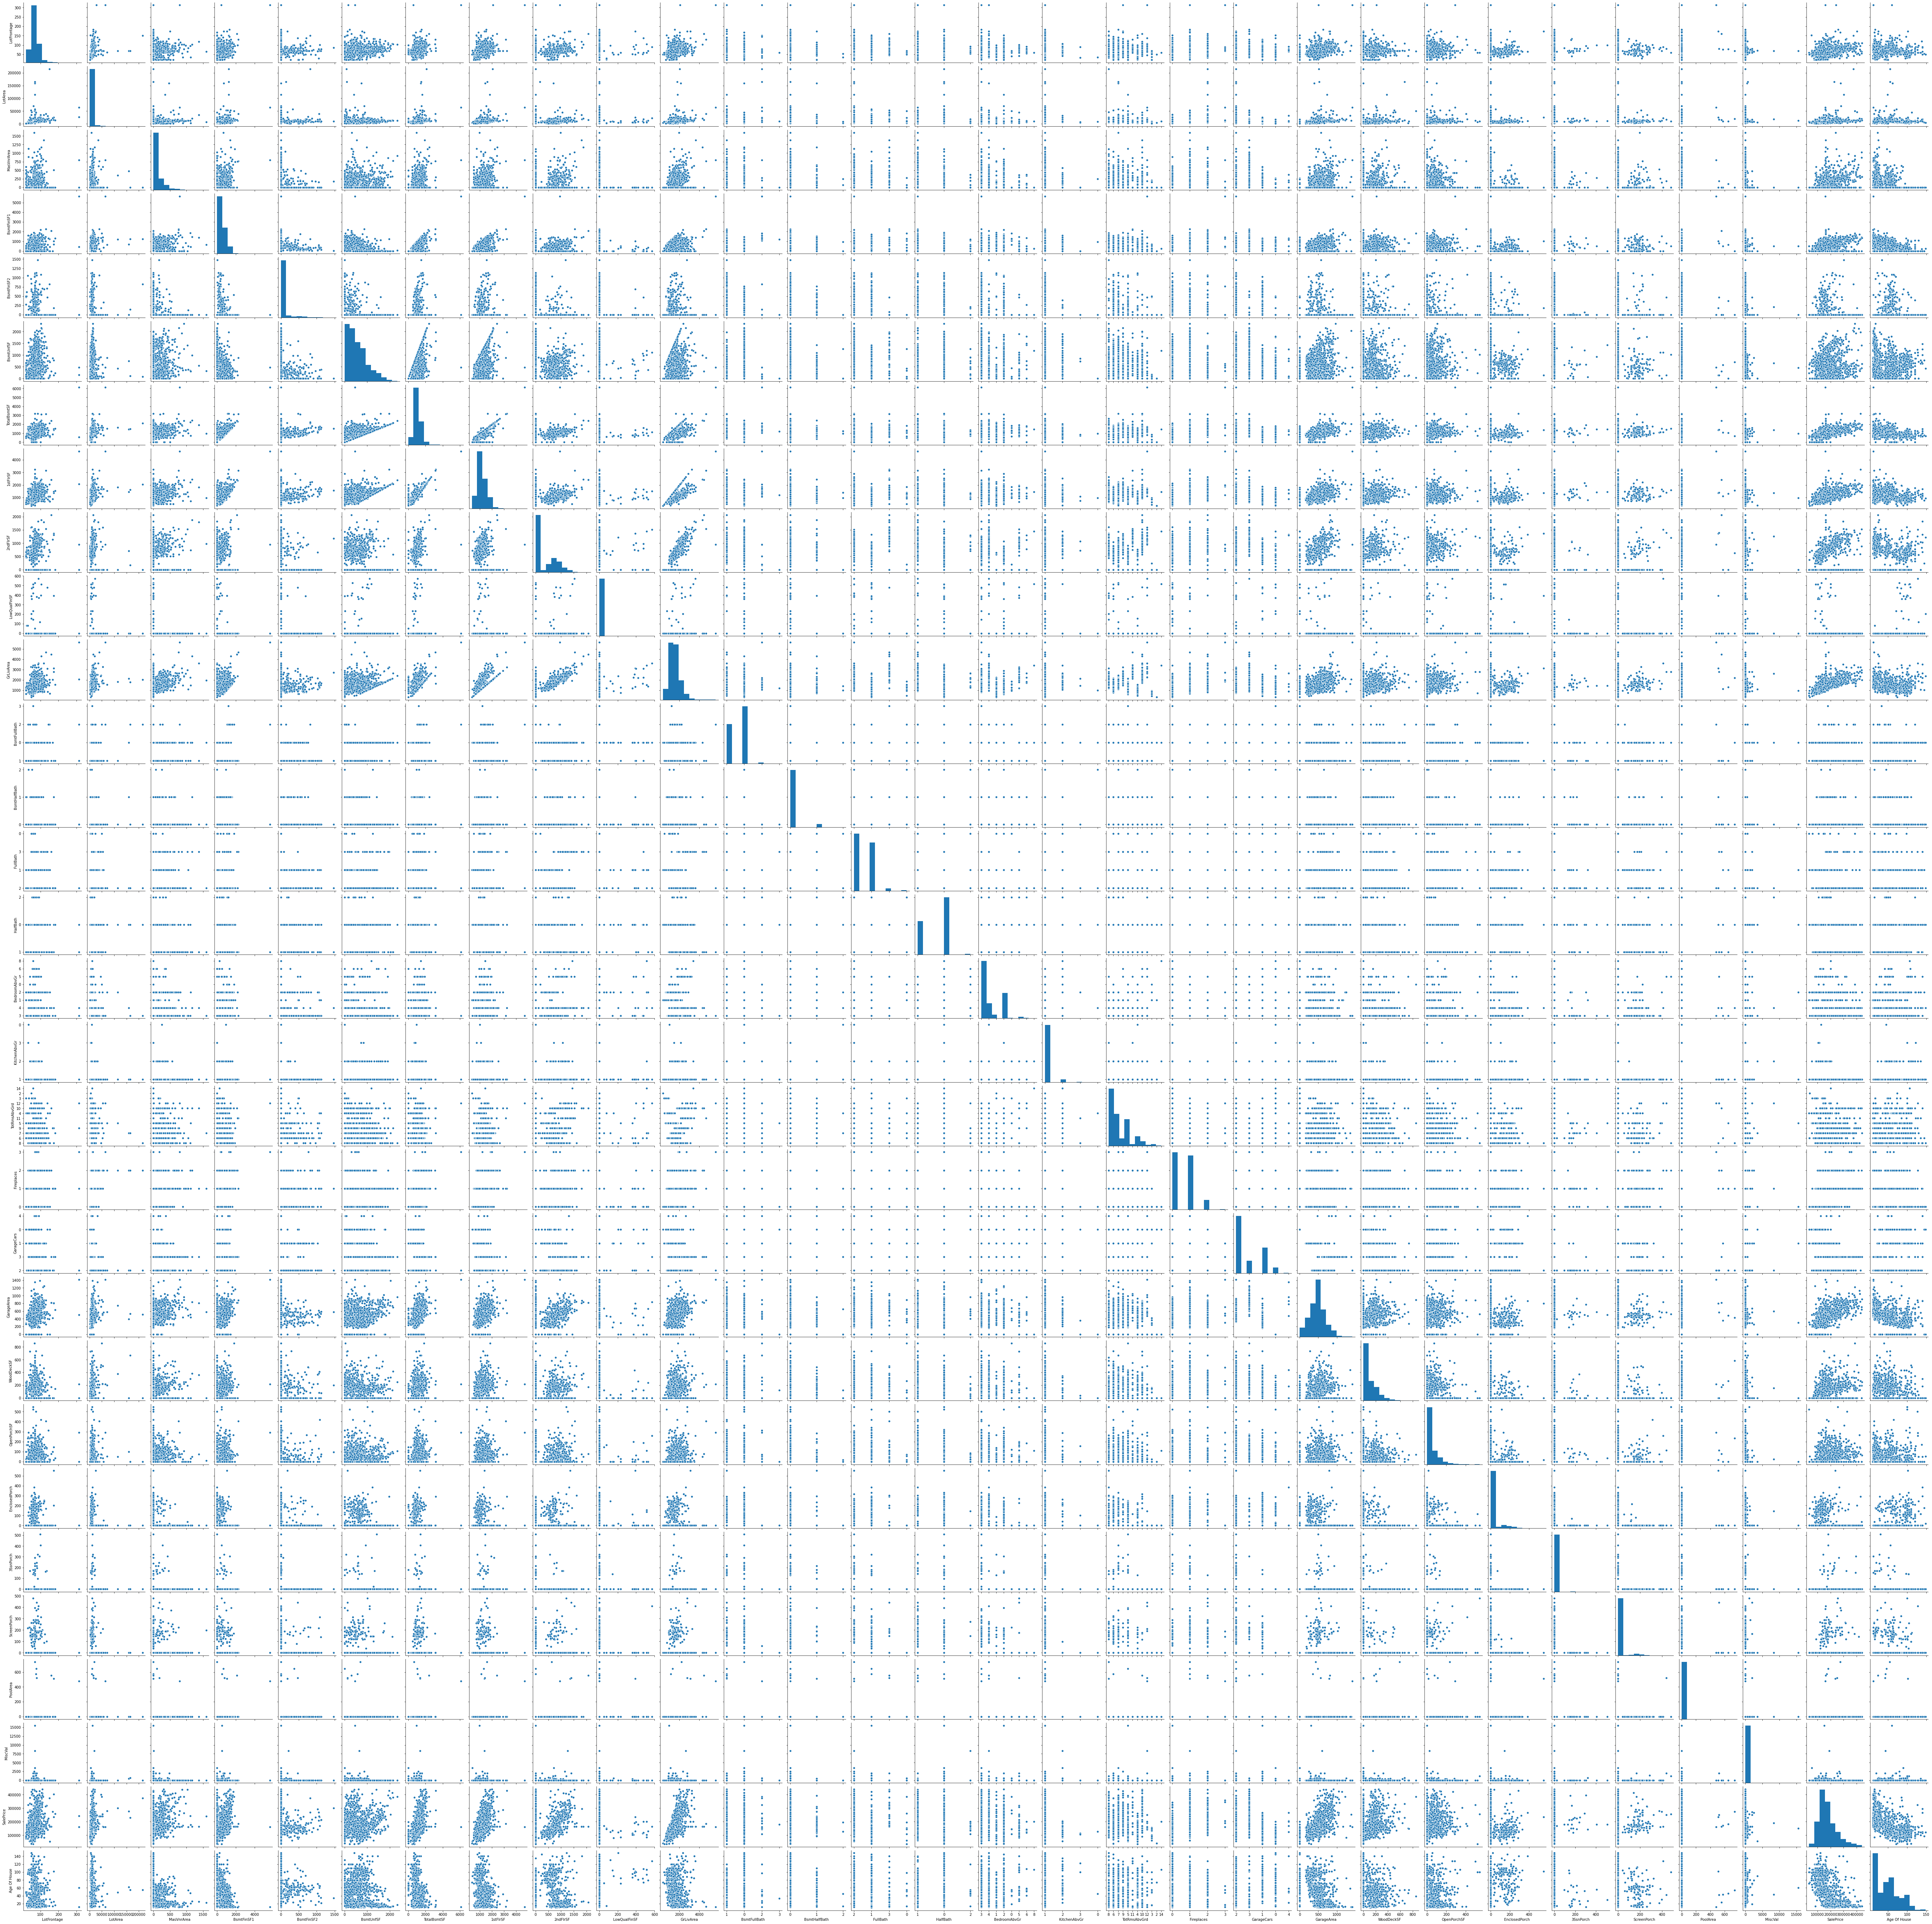

In [0]:
sb.pairplot(data)

## Outliers check

In [0]:
#Used this cell to check the outliers for each of the numerical variables

#sb.boxplot(y=data['LowQualFinSF'])
#plt.yscale('log')

In [0]:
#Used this cell to check the outliers for each of the numerical variables
#sb.distplot(data['LowQualFinSF'])

In [0]:
#Used this cell to check the outliers for each of the numerical variables
#data['LowQualFinSF'].describe()

In [0]:
##Outliers check

data['LotFrontage'] = data['LotFrontage'].apply(lambda x : 69 if x>135 else x)

data['LotArea'] = data['LotArea'].apply(lambda x : 9478 if x>25251 else x)

#imputing single outlier having value 5440(something) with 2000 , taking medain may decrease the importance of the row
data['BsmtFinSF1'] = data['BsmtFinSF1'].apply(lambda x : 2000 if x>5000 else x)

#imputing outliers with value 2000 , taking medain may decrease the importance of the row
data['TotalBsmtSF'] = data['TotalBsmtSF'].apply(lambda x : 2000 if x>3500 else x)

#imputing greater than 2524 with 2219
data['1stFlrSF'] = data['1stFlrSF'].apply(lambda x : 2219 if x>2524 else x)

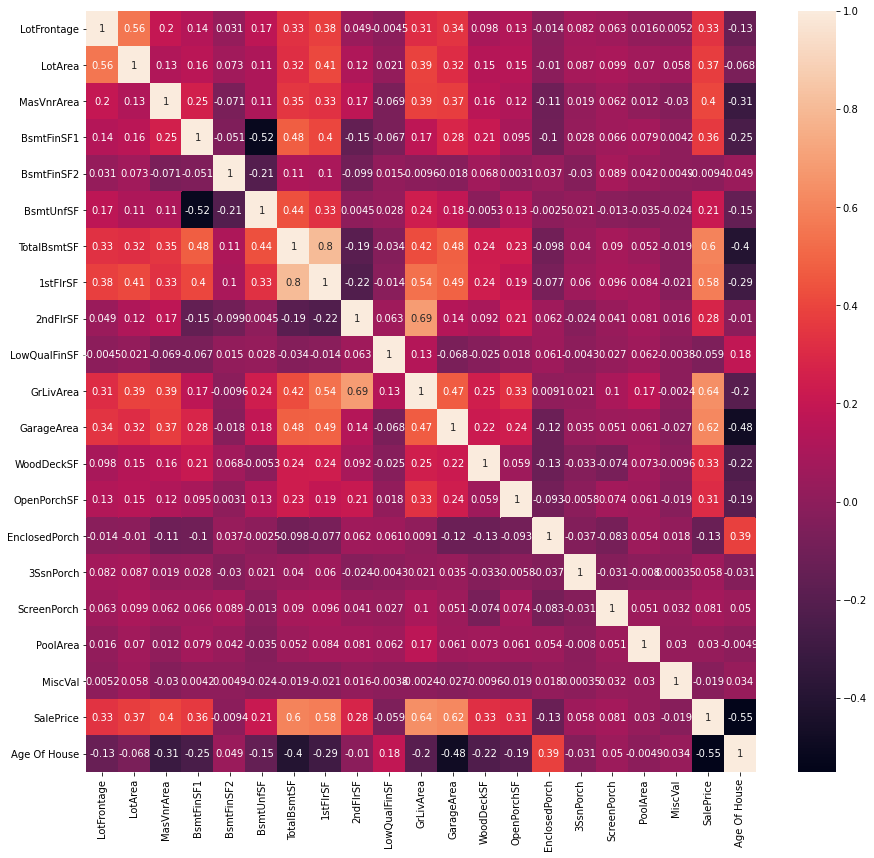

In [0]:
plt.figure(figsize=(15,14))
sb.heatmap(data.corr(),annot=True)

# END : Data Cleaning

In [0]:
data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No Access      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No Access      Reg         Lvl    AllPub       FR2       Gtl      Veenker   
2  No Access      IR1         Lvl    AllPub    Inside       Gtl      CollgCr   
3  No Access      IR1         Lvl    AllPub    Corner       Gtl      Crawfor   
4  No Access      IR1         Lvl    AllPub       FR2       Gtl      NoRidge   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   
2       Norm       Norm     1Fam     2Story           Good     Average   
3       Norm       Norm     1Fam     2Story           Good     Average   
4       Norm       Norm     1Fam     2Story      Very Good     Average   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea BsmtFullBath BsmtHalfBath FullBath HalfBath BedroomAbvGr  \
0       1710            1            0        2        1            3   
1       1262            0            1        2        0            3   
2       1786            1            0        2        1            3   
3       1717            1            0        1        0            3   
4       2198            1            0        2        1            4   

  KitchenAbvGr KitchenQual TotRmsAbvGrd Functional Fireplaces   FireplaceQu  \
0            1          Gd            8        Typ          0  No Fireplace   
1            1          TA            6        Typ          1            TA   
2            1          Gd            6        Typ          1            TA   
3            1          Gd            7        Typ          1            Gd   
4            1          Gd 

In [0]:
data.describe()

LotFrontage       LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean     68.710274   9560.202740   103.117123   441.143836    46.549315   
std      18.228360   3642.487336   180.731373   437.199774   161.319273   
min      21.000000   1300.000000     0.000000     0.000000     0.000000   
25%      60.000000   7553.500000     0.000000     0.000000     0.000000   
50%      69.000000   9477.500000     0.000000   383.500000     0.000000   
75%      78.000000  11341.750000   164.250000   712.250000     0.000000   
max     134.000000  25095.000000  1600.000000  2260.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1054.614384  1158.863699   346.992466      5.844521   
std     441.866955   419.006123   368.209600   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  3206.000000  2524.000000  2065.000000    572.000000   

         GrLivArea   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean   1515.463699   472.980137    94.244521    46.660274      21.954110   
std     525.480383   213.804841   125.338794    66.256028      61.119149   
min     334.000000     0.000000     0.000000     0.000000       0.000000   
25%    1129.500000   334.500000     0.000000     0.000000       0.000000   
50%    1464.000000   480.000000     0.000000    25.000000       0.000000   
75%    1776.750000   576.000000   168.000000    68.000000       0.000000   
max    5642.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  \
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000   
mean      3.409589    15.060959     2.758904     43.489041  176937.826712   
std      29.317331    55.757415    40.177307    496.123024   69270.392151   
min       0.000000     0.000000     0.000000      0.000000   34900.000000   
25%       0.000000     0.000000     0.000000      0.000000  129975.000000   
50%       0.000000     0.000000     0.000000      0.000000  163000.000000   
75%       0.000000     0.000000     0.000000      0.000000  210250.000000   
max     508.000000   480.000000   738.000000  15500.000000  440000.000000   

       Age Of House  
count   1460.000000  
mean      48.732192  
std       30.202904  
min       10.000000  
25%       20.000000  
50%       47.000000  
75%       66.000000  
max      148.000000

# <font color='#891360'> Data Preparation For Modeling </font>
1. Creating dummies for Categotical variables

In [0]:
dummies = pd.get_dummies(data[object_type],drop_first=False)
dummies.shape

(1460, 347)

In [0]:
prep_data = pd.concat([data,dummies],axis=1)

In [0]:
prep_data

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0                2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1     1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2                2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3                2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4                2-STORY 1946 & NEWER       RL         84.0    14260   Pave   
...                               ...      ...          ...      ...    ...   
1455             2-STORY 1946 & NEWER       RL         62.0     7917   Pave   
1456  1-STORY 1946 & NEWER ALL STYLES       RL         85.0    13175   Pave   
1457             2-STORY 1945 & OLDER       RL         66.0     9042   Pave   
1458  1-STORY 1946 & NEWER ALL STYLES       RL         68.0     9717   Pave   
1459  1-STORY 1946 & NEWER ALL STYLES       RL         75.0     9937   Pave   

          Alley LotShape LandContour Utilities LotConfig LandSlope  \
0     No Access      Reg         Lvl    AllPub    Inside       Gtl   
1     No Access      Reg         Lvl    AllPub       FR2       Gtl   
2     No Access      IR1         Lvl    AllPub    Inside       Gtl   
3     No Access      IR1         Lvl    AllPub    Corner       Gtl   
4     No Access      IR1         Lvl    AllPub       FR2       Gtl   
...         ...      ...         ...       ...       ...       ...   
1455  No Access      Reg         Lvl    AllPub    Inside       Gtl   
1456  No Access      Reg         Lvl    AllPub    Inside       Gtl   
1457  No Access      Reg         Lvl    AllPub    Inside       Gtl   
1458  No Access      Reg         Lvl    AllPub    Inside       Gtl   
1459  No Access      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle    OverallQual  \
0         CollgCr       Norm       Norm     1Fam     2Story           Good   
1         Veenker      Feedr       Norm     1Fam     1Story  Above Average   
2         CollgCr       Norm       Norm     1Fam     2Story           Good   
3         Crawfor       Norm       Norm     1Fam     2Story           Good   
4         NoRidge       Norm       Norm     1Fam     2Story      Very Good   
...           ...        ...        ...      ...        ...            ...   
1455      Gilbert       Norm       Norm     1Fam     2Story  Above Average   
1456       NWAmes       Norm       Norm     1Fam     1Story  Above Average   
1457      Crawfor       Norm       Norm     1Fam     2Story           Good   
1458        NAmes       Norm       Norm     1Fam     1Story        Average   
1459      Edwards       Norm       Norm     1Fam     1Story        Average   

        OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0           Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1         Very Good     Gable  CompShg     MetalSd     MetalSd       None   
2           Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3           Average     Gable  CompShg     Wd Sdng     Wd Shng       None   
4           Average     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...             ...       ...      ...         ...         ...        ...   
1455        Average     Gable  CompShg     VinylSd     VinylSd       None   
1456  Above Average     Gable  CompShg     Plywood     Plywood      Stone   
1457      Excellent     Gable  CompShg     CemntBd     CmentBd       None   
1458  Above Average       Hip  CompShg     MetalSd     MetalSd       None   
1459  Above Average     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd    

In [0]:
#check for variables in the original + dummy set
print("Before removing the original variables :",prep_data.shape)

#dropping the original variables
prep_data.drop(object_type,axis=1,inplace=True)

#check for variables after dropping original variables
print("After removing the original variables :",prep_data.shape)

Before removing the original variables : (1460, 423)
After removing the original variables : (1460, 368)


In [0]:
prep_data

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0         706           0        150   
1            80.0     9600         0.0         978           0        284   
2            68.0    11250       162.0         486           0        434   
3            60.0     9550         0.0         216           0        540   
4            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1455         62.0     7917         0.0           0           0        953   
1456         85.0    13175       119.0         790         163        589   
1457         66.0     9042         0.0         275           0        877   
1458         68.0     9717         0.0          49        1029          0   
1459         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0             856       856       854             0       1710         548   
1            1262      1262         0             0       1262         460   
2             920       920       866             0       1786         608   
3             756       961       756             0       1717         642   
4            1145      1145      1053             0       2198         836   
...           ...       ...       ...           ...        ...         ...   
1455          953       953       694             0       1647         460   
1456         1542      2073         0             0       2073         500   
1457         1152      1188      1152             0       2340         252   
1458         1078      1078         0             0       1078         240   
1459         1256      1256         0             0       1256         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  SalePrice  Age Of House  \
0            0        0     208500            17   
1            0        0     181500            44   
2            0        0     223500            19   
3            0        0     140000           105   
4            0        0     250000            20   
...        ...      ...        ...           ...   
1455         0        0     175000            21   
1456         0        0     210000            42   
1457         0     2500     266500            79   
1458         0        0     142125            70   
1459         0        0     147500            55   

      MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   
...                                            ...   
1455                                             0   
1456                                             0   
1457                                             0   
1458                                             0   
1459                                             0   

     

### Train - Test Split

In [0]:
df_train,df_test = train_test_split(prep_data,train_size=0.7,random_state=100)

In [0]:
print(df_train.shape)
print(df_test.shape)

(1021, 368)
(439, 368)


In [0]:
df_test

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436         60.0     9000         0.0         616           0        248   
57           89.0    11645         0.0           0           0        860   
780          63.0     7875        38.0           0           0       1237   
382          79.0     9245         0.0           0           0        939   
1170         76.0     9880         0.0         522           0        574   
...           ...      ...         ...         ...         ...        ...   
555          58.0     6380         0.0           0           0        993   
399          65.0     8125       100.0         812           0        280   
545          69.0    13837       178.0        1002         202          0   
266          70.0    11207         0.0         714           0         88   
210          67.0     5604         0.0         468           0        396   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
1436          864       864         0             0        864         528   
57            860       860       860             0       1720         565   
780          1237      1253         0             0       1253         402   
382           939       939       858             0       1797         639   
1170         1096      1118         0             0       1118         358   
...           ...       ...       ...           ...        ...         ...   
555           993      1048         0             0       1048         280   
399          1092      1112       438             0       1550         438   
545          1204      1377       806             0       2183         786   
266           802       802       709             0       1511         413   
210           864       864         0             0        864           0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1436           0            0              0          0            0   
57             0           70              0          0            0   
780          220           21              0          0            0   
382          144           53              0          0            0   
1170         203            0              0          0            0   
...          ...          ...            ...        ...          ...   
555            0            0            116          0            0   
399            0          168              0          0            0   
545            0            0              0          0            0   
266           95           75              0          0            0   
210            0            0             96          0            0   

      PoolArea  MiscVal  SalePrice  Age Of House  \
1436         0        0     120500            49   
57           0        0     196500            16   
780          0        0     176000            25   
382          0        0     213500            14   
1170       576        0     171000            43   
...        ...      ...        ...           ...   
555          0        0     113000            98   
399          0        0     241000            14   
545          0        0     229000            32   
266          0        0     185000            23   
210          0        0      98000            95   

      MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES  \
1436                                             0   
57                                               0   
780                                              0   
382                                              0   
1170                                             0   
...                                            ...   
555                                              1   
399                                              0   
545                                              0   
266                                              0   
210                                              0   

     

## Scaling

In [0]:
#@title Default title text
scaler = MinMaxScaler()

#fitting the data to scaler (learning min/max) and transforming it (formula calculated)
df_train[num_type] = scaler.fit_transform(df_train[num_type])

#transforming the test set based on min/max of learnt on train set
df_test[num_type] = scaler.transform(df_test[num_type])

In [0]:
df_train

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
318      0.610619  0.358075     0.16000    0.436726    0.000000   0.154110   
239      0.274336  0.308804     0.00000    0.041593    0.000000   0.274401   
986      0.336283  0.162947     0.00000    0.000000    0.000000   0.207620   
1416     0.345133  0.419292     0.00000    0.000000    0.000000   0.332620   
390      0.256637  0.294520     0.00000    0.106637    0.265265   0.098031   
...           ...       ...         ...         ...         ...        ...   
802      0.371681  0.285763     0.00000    0.286726    0.000000   0.034247   
53       0.415929  0.340135     0.00000    0.800885    0.000000   0.013699   
350      0.415929  0.269651     0.22625    0.000000    0.000000   0.800086   
79       0.345133  0.381031     0.00000    0.000000    0.000000   0.188356   
792      0.628319  0.358925     0.00000    0.381416    0.000000   0.109161   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
318      0.420150  0.482625  0.616949           0.0   0.424289    0.462623   
239      0.229258  0.205598  0.333656           0.0   0.201576    0.155148   
986      0.151279  0.303571  0.307022           0.0   0.230015    0.179831   
1416     0.242358  0.421815  0.505569           0.0   0.355880    0.394922   
390      0.268559  0.284266  0.196610           0.0   0.178517    0.270804   
...           ...       ...       ...           ...        ...         ...   
802      0.227074  0.171815  0.352542           0.0   0.195619    0.289140   
53       0.574548  0.709459  0.000000           0.0   0.269792    0.630465   
350      0.582969  0.722490  0.000000           0.0   0.274981    0.435120   
79       0.137243  0.149614  0.265375           0.0   0.152191    0.310296   
792      0.348409  0.364382  0.429056           0.0   0.302652    0.320874   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
318     0.396733     0.114723       0.260870        0.0          0.0   
239     0.000000     0.267686       0.000000        0.0          0.0   
986     0.459743     0.000000       0.000000        0.0          0.0   
1416    0.000000     0.000000       0.206522        0.0          0.0   
390     0.000000     0.248566       0.202899        0.0          0.0   
...          ...          ...            ...        ...          ...   
802     0.042007     0.034417       0.000000        0.0          0.0   
53      1.000000     0.137667       0.000000        0.0          0.0   
350     0.245041     0.103250       0.000000        0.0          0.0   
79      0.086348     0.000000       0.231884        0.0          0.0   
792     0.210035     0.248566       0.000000        0.0          0.0   

      PoolArea  MiscVal  SalePrice  Age Of House  \
318        0.0      0.0   0.555665      0.123188   
239        0.0      0.0   0.192792      0.471014   
986        0.0      0.0   0.202666      0.724638   
1416       0.0      0.0   0.216243      0.905797   
390        0.0      0.0   0.207603      0.797101   
...        ...      ...        ...           ...   
802        0.0      0.0   0.380400      0.036232   
53         0.0      0.0   0.864231      0.210145   
350        0.0      0.0   0.698990      0.021739   
79         0.0      0.0   0.185386      0.724638   
792        0.0      0.0   0.579832      0.101449   

      MSSubClass_1-1/2 STORY - UNFINISHED ALL AGES  \
318                                              0   
239                                              0   
986                                              0   
1416                                             0   
390                                              0   
...                                            ...   
802                                              0   
53                                               0   
350                                              0   
79                                               0   
792                                             

In [0]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [0]:
#Finding optimal number of Fetures (1st hyperparameter)
#from sklearn.model_selection import GridSearchCV
feature_hyperparameter = {'n_features_to_select':list(range(1,len(X_train.columns)+1))}
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe = RFE(lm)


model_cv = GridSearchCV(estimator = rfe,
            param_grid = feature_hyperparameter,
            scoring='r2',
            cv=5,
            return_train_score= True)

model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20, 21, 22, 23, 24,
                                                  25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=0)

In [0]:
results_feature = pd.DataFrame(model_cv.cv_results_)

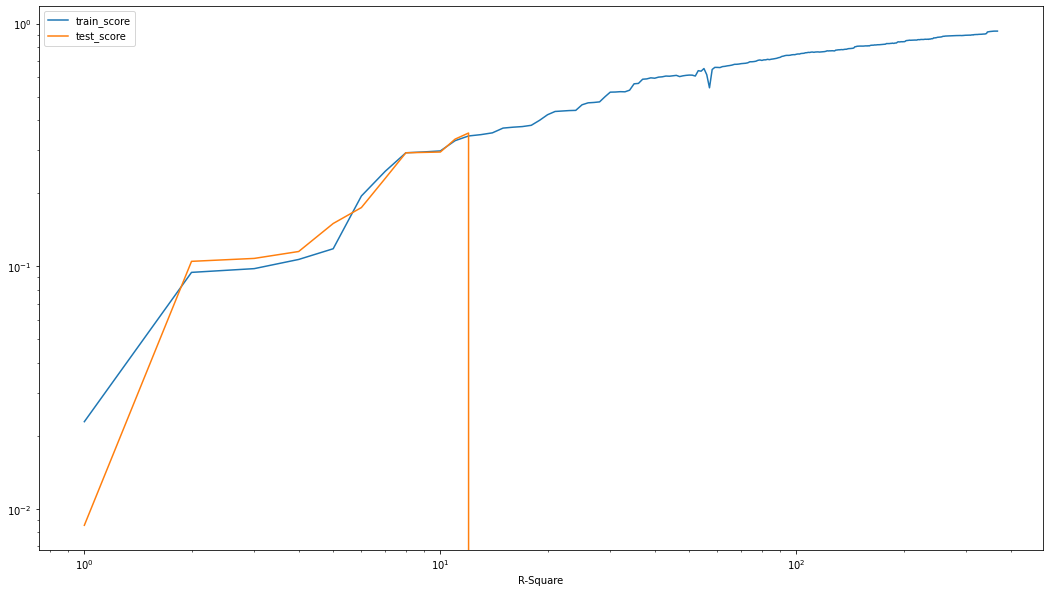

In [0]:
plt.figure(figsize=(18,10))
plt.plot(results_feature['param_n_features_to_select'],results_feature['mean_train_score'])
plt.plot(results_feature['param_n_features_to_select'],results_feature['mean_test_score'])
plt.xlabel('Hyperparameter')
plt.xlabel('R-Square')
plt.yscale('log')
plt.xscale('log')
plt.legend(['train_score','test_score'],loc='upper left')

In [0]:
#This is just to see what number of features would be best for our model,not using it here as Lasso will take care of the numnber of feature


In [0]:
lambda_hyperparameter = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50]}

ridge = Ridge()

model_cv = GridSearchCV(estimator=ridge,
                        param_grid = lambda_hyperparameter,
                        scoring='neg_mean_absolute_error',
                        cv = 5,
                        verbose = 1,
                        return_train_score = True
                        )

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    3.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
results = pd.DataFrame(model_cv.cv_results_)
results.shape
results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.023785      0.010483         0.002710        0.000055      0.0001   
1        0.022058      0.006044         0.002820        0.000164       0.001   
2        0.019331      0.000388         0.002778        0.000102        0.01   
3        0.020840      0.003397         0.002893        0.000344        0.05   
4        0.018900      0.000242         0.002792        0.000092         0.1   
5        0.018983      0.000377         0.002813        0.000172         0.2   
6        0.018550      0.000366         0.002705        0.000078         0.3   
7        0.018107      0.000280         0.002626        0.000072         0.4   
8        0.018295      0.000100         0.002711        0.000062         0.5   
9        0.018635      0.000624         0.002669        0.000042         0.6   
10       0.018327      0.000367         0.002707        0.000141         0.7   
11       0.020827      0.005084         0.002732        0.000094         0.8   
12       0.018853      0.000309         0.002790        0.000090         0.9   
13       0.018977      0.000190         0.002821        0.000260           1   
14       0.018406      0.000503         0.002665        0.000065           2   
15       0.017734      0.000285         0.002678        0.000038           3   
16       0.017959      0.000350         0.002647        0.000064           4   
17       0.017630      0.000247         0.002723        0.000064           5   
18       0.018188      0.000586         0.002695        0.000078           6   
19       0.018142      0.000979         0.002654        0.000048           7   
20       0.017985      0.000263         0.002682        0.000031           8   
21       0.018239      0.000250         0.002764        0.000118           9   
22       0.017792      0.000327         0.002709        0.000128          10   
23       0.017823      0.000584         0.002683        0.000115          20   
24       0.018131      0.000167         0.002713        0.000048          50   

               params  split0_test_score  split1_test_score  \
0   {'alpha': 0.0001}          -0.057114          -0.062987   
1    {'alpha': 0.001}          -0.053329          -0.062560   
2     {'alpha': 0.01}          -0.050465          -0.059948   
3     {'alpha': 0.05}          -0.048934          -0.057391   
4      {'alpha': 0.1}          -0.048264          -0.056437   
5      {'alpha': 0.2}          -0.047324          -0.055323   
6      {'alpha': 0.3}          -0.046650          -0.054564   
7      {'alpha': 0.4}          -0.046123          -0.054022   
8      {'alpha': 0.5}          -0.045692          -0.053641   
9      {'alpha': 0.6}          -0.045353          -0.053324   
10     {'alpha': 0.7}          -0.045074          -0.053038   
11     {'alpha': 0.8}          -0.044842          -0.052784   
12     {'alpha': 0.9}          -0.044661          -0.052566   
13     {'alpha': 1.0}          -0.044505          -0.052364   
14     {'alpha': 2.0}          -0.043682          -0.051360   
15     {'alpha': 3.0}          -0.043148          -0.050909   
16     {'alpha': 4.0}          -0.042784          -0.050610   
17     {'alpha': 5.0}          -0.042519          -0.050436   
18     {'alpha': 6.0}          -0.042343          -0.050317   
19     {'alpha': 7.0}          -0.042214          -0.050235   
20     {'alpha': 8.0}          -0.042109          -0.050202   
21     {'alpha': 9.0}          -0.042018          -0.050191   
22    {'alpha': 10.0}          -0.041964          -0.050181   
23      {'alpha': 20}          -0.042630          -0.051011   
24      {'alpha': 50}          -0.045444          -0.053999   

    split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           -0.061340          -0.050358          -0.048527        -0.056065   
1           -0.060641          -0.050457          -0.048437        -0.055085   
2           -0.059411          -0.049584    

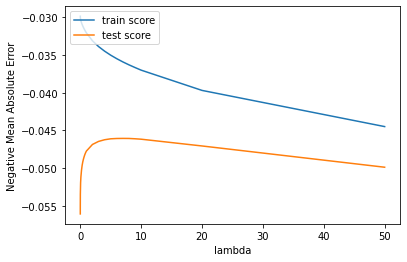

In [0]:
#results['param_alpha'] = results['param_alpha'].astype('int32')

plt.plot(results['param_alpha'],results['mean_train_score'])
plt.plot(results['param_alpha'],results['mean_test_score'])
plt.xlabel('lambda')
#plt.xscale('log')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper left')

In [0]:
final_ridge = Ridge(alpha=9)

final_ridge.fit(X_train,y_train)

pd.DataFrame({'Features' : X_train.columns ,'Coeffiecents' : final_ridge.coef_}).head(10)

Features  Coeffiecents
0   LotFrontage      0.001493
1       LotArea      0.048916
2    MasVnrArea      0.018530
3    BsmtFinSF1      0.035997
4    BsmtFinSF2      0.012496
5     BsmtUnfSF      0.011358
6   TotalBsmtSF      0.042166
7      1stFlrSF      0.091040
8      2ndFlrSF      0.040609
9  LowQualFinSF      0.002754

In [0]:
# Lasso

In [0]:
lambda_hyperparameter = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5]}

lasso = Lasso()

model_cv_lasso = GridSearchCV(estimator=lasso,
                              param_grid = lambda_hyperparameter,
                              scoring='neg_mean_absolute_error',
                              cv = 5,
                              verbose = 1,
                              return_train_score = True)
                              
model_cv_lasso.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [0]:
lasso_results = pd.DataFrame(model_cv_lasso.cv_results_)
lasso_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.069342      0.018516         0.002759        0.000046      0.0001   
1       0.020647      0.002329         0.002727        0.000038       0.001   
2       0.016551      0.005819         0.003030        0.000792        0.01   
3       0.009730      0.000228         0.002312        0.000034        0.05   
4       0.010080      0.001061         0.002378        0.000123         0.1   
5       0.009616      0.000145         0.002377        0.000089         0.2   
6       0.009532      0.000112         0.002344        0.000058         0.3   
7       0.009944      0.000099         0.002509        0.000094         0.4   
8       0.010089      0.000355         0.002460        0.000100         0.5   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.041287          -0.050342          -0.051135   
1   {'alpha': 0.001}          -0.042983          -0.051623          -0.052634   
2    {'alpha': 0.01}          -0.071331          -0.081671          -0.076329   
3    {'alpha': 0.05}          -0.133730          -0.135308          -0.130990   
4     {'alpha': 0.1}          -0.135706          -0.136599          -0.133288   
5     {'alpha': 0.2}          -0.135706          -0.136599          -0.133288   
6     {'alpha': 0.3}          -0.135706          -0.136599          -0.133288   
7     {'alpha': 0.4}          -0.135706          -0.136599          -0.133288   
8     {'alpha': 0.5}          -0.135706          -0.136599          -0.133288   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.039958          -0.041270        -0.044798        0.004880   
1          -0.042960          -0.047380        -0.047516        0.004108   
2          -0.068008          -0.078131        -0.075094        0.004866   
3          -0.125509          -0.133811        -0.131870        0.003472   
4          -0.127121          -0.136303        -0.133803        0.003538   
5          -0.127121          -0.136303        -0.133803        0.003538   
6          -0.127121          -0.136303        -0.133803        0.003538   
7          -0.127121          -0.136303        -0.133803        0.003538   
8          -0.127121          -0.136303        -0.133803        0.003538   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.032805           -0.032379   
1                2           -0.043738           -0.042339   
2                3           -0.074985           -0.072179   
3                4           -0.131994           -0.130911   
4                5           -0.133949           -0.132235   
5                5           -0.133949           -0.132235   
6                5           -0.133949           -0.132235   
7                5           -0.133949           -0.132235   
8                5           -0.133949           -0.132235   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.031962           -0.034292           -0.031814   
1           -0.043108           -0.044163           -0.042542   
2           -0.073976           -0.074627           -0.072779   
3           -0.131033           -0.133227           -0.131476   
4           -0.133541           -0.134677           -0.133899   
5           -0.133541           -0.134677           -0.133899   
6           -0.133541           -0.134677           -0.133899   
7           -0.133541           -0.134677           -0.133899   
8           -0.133541           -0.134677           -0.133899   

   mean_train_score  std_train_score  
0         -0.032650         0.000890  
1         -0.043178         0.000692  
2         -0.073709         0.001072  
3         -0.131728         0.000840  
4         -0.133660         0.000803  
5         -0.133660         0.000803  
6         -0.133660         0.000803  
7         -0.133660         0.000803  
8         -0.1336

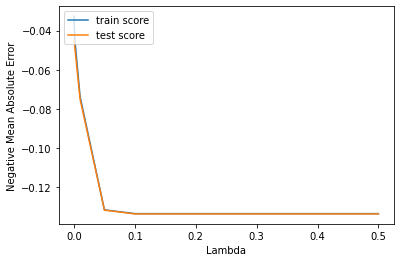

In [0]:
plt.plot(lasso_results['param_alpha'],lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'],lasso_results['mean_test_score'])
plt.xlabel('Lambda')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score', 'test score'], loc='upper left')

In [0]:
lasso = Lasso(alpha=0.001)

lassoo = lasso.fit(X_train,y_train)

pd.DataFrame({'Features' : X_train.columns ,'Coeffiecents' : lassoo.coef_}).head(10)

Features  Coeffiecents
0   LotFrontage      0.000000
1       LotArea      0.045436
2    MasVnrArea      0.000000
3    BsmtFinSF1      0.017223
4    BsmtFinSF2      0.000000
5     BsmtUnfSF      0.000000
6   TotalBsmtSF      0.010378
7      1stFlrSF      0.194407
8      2ndFlrSF      0.053663
9  LowQualFinSF     -0.000000

In [0]:
print(lassoo)
print(final_ridge)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


In [0]:
# Prediction on Test Set
#1. Using Ridge
#2. Using Lasso

In [0]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [0]:
#predictions on train set
y_train_pred  = final_ridge.predict(X_train)

r2_score(y_train,y_train_pred)


0.891367398933747

## Using Ridge

In [0]:
#predictions on the test set
y_test_pred = final_ridge.predict(X_test)

r2_score(y_test,y_test_pred)

0.7173474555870536

## Using Lasso

In [0]:
#predictions on train set
y_train_pred  = lassoo.predict(X_train)

r2_score(y_train,y_train_pred)

0.8483008025147367

In [0]:
#predictions on the test set
y_test_pred = lassoo.predict(X_test)

r2_score(y_test,y_test_pred)

0.7076539892212256